In [0]:
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 49kB/s 
     |████████████████████████████████| 3.1MB 37.2MB/s 
     |████████████████████████████████| 501kB 40.1MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import csv
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
images = []
labels = []
with open("/content/drive/My Drive/AI content/datasets/mnist/train.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
      # if(int(row[0])==0 or int(row[0])==1):
        labels.append(int(row[0]))
        image = []
        for i in range(1,785):
          image.append(int(row[i]))
        images.append(image)


print(len(image))
print(len(labels))

784
42000


In [0]:
X = np.array(images)
Y = np.array(labels)
print(X[10][20])


0


In [0]:
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [0]:
X_train = X[:30000]
Y_train = Y[:30000]


In [0]:
print(X_train.shape)
X_train = X_train/255

(30000, 784)


In [0]:
model = tf.keras.Sequential([      #tf.keras.layers.BatchNormalization(input_shape = (None,784)),
                                   tf.keras.layers.Dense(20,input_shape = (784,),activation  = 'relu'),
                                   tf.keras.layers.Dense(10,activation = 'softmax',input_shape = (784,))
])
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,32,10,1,None,0.1,shuffle=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
Train on 27000 samples, validate on 3000 samples
Epoch 1/10
27000/27000 [==============================] - 2s 65us/sample - loss: 0.5677 - accuracy: 0.8404 - val_loss: 0.3277 - val_accuracy: 0.9027
Epoch 2/10
27000/27000 [==============================] - 2s 60us/sample - loss: 0.2799 - accuracy: 0.9210 - val_loss: 0.2821 - val_accuracy: 0.9183
Epoch 3/10
27000/27000 [==============================] - 2s 58us/sample - loss: 0.2346 - accuracy: 0.9326 - val_loss: 0.2562 - val_accuracy: 0.9257
Epoch 4/10
27000

0


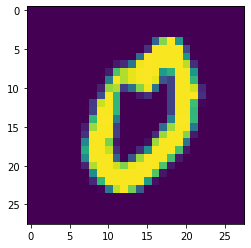

In [0]:
Z = X_train
i = np.random.randint(10,30000)
T = np.expand_dims(Z[i],axis = -1)
ans = model.predict(T.T)
print(np.argmax(ans))
img = np.reshape(Z[i],(28,28))
imgplot = plt.imshow(img)

# **Method 1 by moving according to the weights of the matrix**

In [0]:
weights = model.get_weights()
weights = np.array(weights)
layer1_weights = weights[0]
layer2_weights = weights[2]
node_0_weights = layer2_weights[:,3]
# print(node_0_weights)
max_node_layer_1_output = np.argsort(node_0_weights)[4*node_0_weights.shape[0]//5:]
node_0_least_weights = np.argsort(node_0_weights)[:node_0_weights.shape[0]//5]
# print(node_0_weights[max_node_layer_1_output])
max_inputs = []
min_inputs = []
for i in range(len(max_node_layer_1_output)):
  node_i_layer_0_weights = layer1_weights[:,max_node_layer_1_output[i]]
  node_i_layer_0_min_weights = layer1_weights[:,node_0_least_weights[i]]
  # print(node_i_layer_0_weights)
  corresponding_top_weights = np.argsort(node_i_layer_0_weights)[49*node_i_layer_0_weights.shape[0]//50:]
  corresponding_low_weights = np.argsort(node_i_layer_0_min_weights)[49*node_i_layer_0_min_weights.shape[0]//50:]
  # print(node_i_layer_0_weights[corresponding_top_weights])
  max_inputs.append(corresponding_top_weights)
  min_inputs.append(corresponding_low_weights)
  # print(len(max_inputs))

In [0]:
max_inputs = np.array(max_inputs)
min_inputs = np.array(min_inputs)
print(max_inputs.shape)
print(min_inputs.shape)

(4, 16)
(4, 16)


3


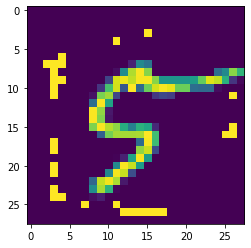

In [0]:
j = np.random.randint(20,7500)
for t in range(j,7500):
  j =t
  if(Y_train[t]!=2):
    break
  
Z = np.copy(X_train[j])

Z[max_inputs[:,-10:]] = 1
# Z[min_inputs[:,:8]] = 0
T = np.expand_dims(Z,axis = -1)
ans = model.predict(T.T)
print(np.argmax(ans))
img = np.reshape(Z,(28,28))
imgplot = plt.imshow(img)

In [0]:
model1 = tf.keras.Sequential([      #tf.keras.layers.BatchNormalization(input_shape = (None,784)),
                                   tf.keras.layers.Dense(25,input_shape = (784,),activation  = 'relu'),
                                   tf.keras.layers.Dense(10,activation = 'softmax',input_shape = (784,))
])
model1.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model1.summary()
model1.fit(X_train,Y_train,32,10,1,None,0.1,shuffle=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 25)                19625     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________
Train on 27000 samples, validate on 3000 samples
Epoch 1/10
27000/27000 [==============================] - 2s 70us/sample - loss: 0.4836 - accuracy: 0.8650 - val_loss: 0.2901 - val_accuracy: 0.9193
Epoch 2/10
27000/27000 [==============================] - 2s 66us/sample - loss: 0.2447 - accuracy: 0.9269 - val_loss: 0.2391 - val_accuracy: 0.9323
Epoch 3/10
27000/27000 [==============================] - 2s 66us/sample - loss: 0.2012 - accuracy: 0.9401 - val_loss: 0.2201 - val_accuracy: 0.9373
Epoch 4/10
27000

# **Method- 2 by moving according to the effects of changing the pixel value by little amount and see changes in outputs**

In [0]:

j = np.random.randint(0,3000)
print(j)
X_train = X[:30000]
Y_train = Y[:30000]
X_train = X_train/255
increase_values = []
Z = np.copy(X_train[j])
T = np.expand_dims(Z,axis = -1)
# print(T.shape)
T = T.T
# print(T.shape)
actual_ans = model.predict(T)
Z = T
value = []
l = 7
# print(actual_ans)
# k = np.random.randint(0,784)
# l = np.random.randint(0,9)
# print(Z[0,k])
# print(k)
print(l)
for i in range(784):
  Z[0][i] = Z[0][i]+.1
  temp_ans = model.predict(Z)
  increase_values.append(temp_ans[0][l]-actual_ans[0][l])
  Z[0][i] = Z[0][i]-.1

2628
7


In [0]:
val = np.argsort(increase_values)
print(increase_values[0:10])

[6.3005245e-10, 3.22716e-08, 2.7072929e-08, -2.0812422e-08, 6.018604e-08, -3.1675654e-08, 4.407184e-08, 3.2586286e-08, -5.8635123e-08, -5.7403668e-08]


In [0]:
for i in range(10):
  print(increase_values[val[-i-1]])

8.990821e-07
8.237005e-07
6.917719e-07
6.868038e-07
6.7218593e-07
6.7042924e-07
5.8746195e-07
5.751044e-07
5.696463e-07
5.674501e-07


7


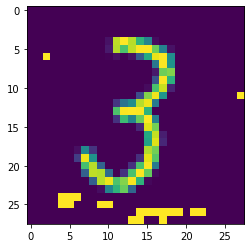

In [0]:

L = np.copy(X_train[j])
j = np.random.randint(20,7900)
for t in range(j,8000):
  j =t
  if(Y_train[t]!=4):
    break
for k in range(20):
  L[val[783-k]] = 1
  # L[val[k]] = 0

U = np.expand_dims(L,axis = -1)
ans = model.predict(U.T)
print(np.argmax(ans))
img = np.reshape(L,(28,28))
imgplot = plt.imshow(img)